### import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=0)

### helper functions

In [2]:
def random_walk(positions, mean=0, std=1, num_iter=10000, a=1, b=1, chm_src=False):
    '''
    positions:
        the initail ndarray of shape # population & # dimentions
    mean & std:
        mean and std are parameters of the guassion distribution 
        from which random displacement vectors for each bacteria is chosen
    num_iter:
        for how many iterations simulate the model
    a, b, chm_src:
        parameters of the chemical source
    
    random_walk:
        random_walk choses a random displacement vector for each bacteria and steps the model for
        the specified number of iter.
        It stores the average location of all the agents after each iter and returns this average after simulation.
    '''
    
    population, dimention = positions.shape
    
    memo = []
    for _ in xrange(num_iter):
        # add the average position to memo
        memo.append(np.mean(positions, 0))
        
        # chose a random displacement
        step = np.random.normal(
            loc=mean, scale=std,
            size=(population, dimention)
        ).reshape(population, dimention)
        
        if chm_src:
            euc_dis = np.sum(np.power(positions, 2), 1)
            signal = a * np.exp(-euc_dis / b)
            source_vec = -positions * signal.reshape(-1, 1)
            step += source_vec
                
        # update
        positions += step

    # the last update
    memo.append(np.mean(positions, 0))
    return np.array(memo)

In [3]:
def mean_squared_dis(pos):
    '''
    pos:
        ndarray of shape # number iter, # dim
    mean_squared_dis:
        returns the mean squared displacement for each iter
        # https://en.wikipedia.org/wiki/Mean_squared_displacement
    '''
    num_iter, num_dim = pos.shape
    msd = np.zeros(num_iter)
    for i in xrange(1, num_iter):
        sum_sqr_dis = msd[i-1] * (i - 1)
        dis_sqr = np.sum(np.power(pos[i,:], 2))
        msd[i] = (sum_sqr_dis + dis_sqr) / i
    
    return msd

In [4]:
def plot_random_walk(memo):
    plt.figure(figsize=(16, 6))
    
    plt.subplot(2, 1, 1)
    plt.title('random walk')
    plt.plot(memo)
    plt.legend(['x','y','z'])
    
    plt.subplot(2, 1, 2)
    plt.title('mean squared displacement')
    plt.plot(mean_squared_dis(memo))
    plt.legend(['msd'])

In [5]:
def iterator(num_iter=10000, population=100, mean=0, std=1, a=1, b=1, chm_src=False):
    init_bacteria_pos = np.random.normal(
        loc=mean,
        scale=std,
        size=(population, 3)
    ).reshape(population, 3)
    
    memo = random_walk(init_bacteria_pos, mean=mean, std=std, num_iter=num_iter, a=a, b=b, chm_src=chm_src)
    
    plot_random_walk(memo)

## random walks
keep all the parameters constant except

### # iterations

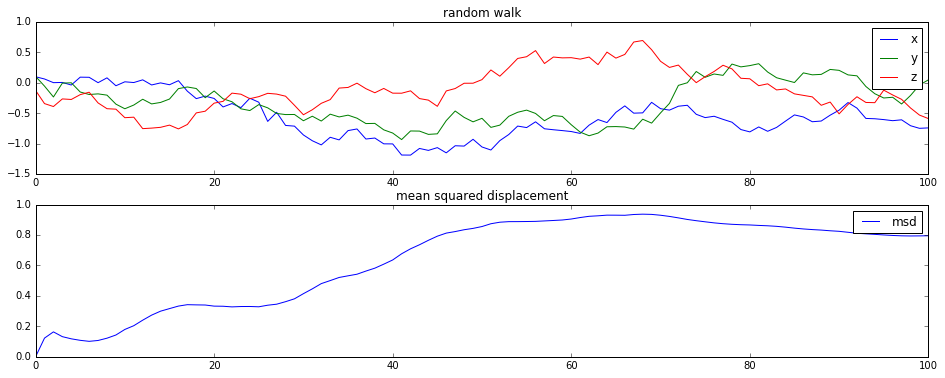

In [6]:
iterator(num_iter=100)

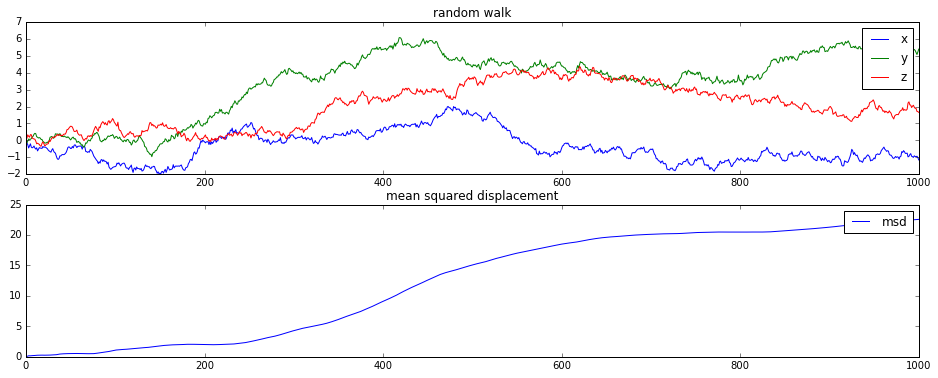

In [7]:
iterator(num_iter=1000)

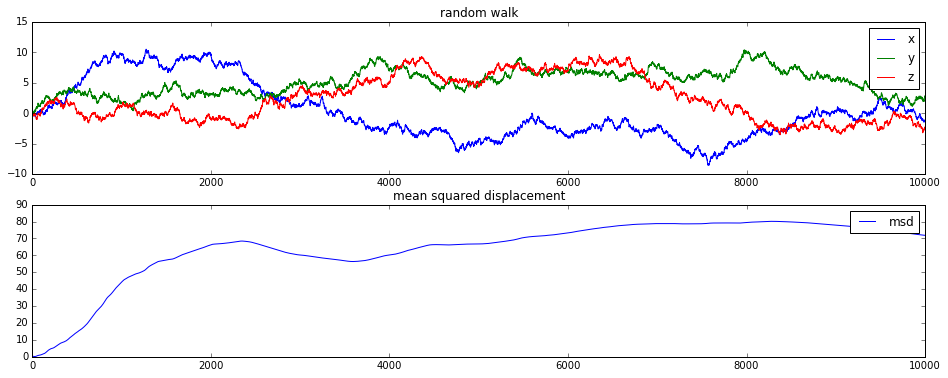

In [8]:
iterator(num_iter=10000)

### population

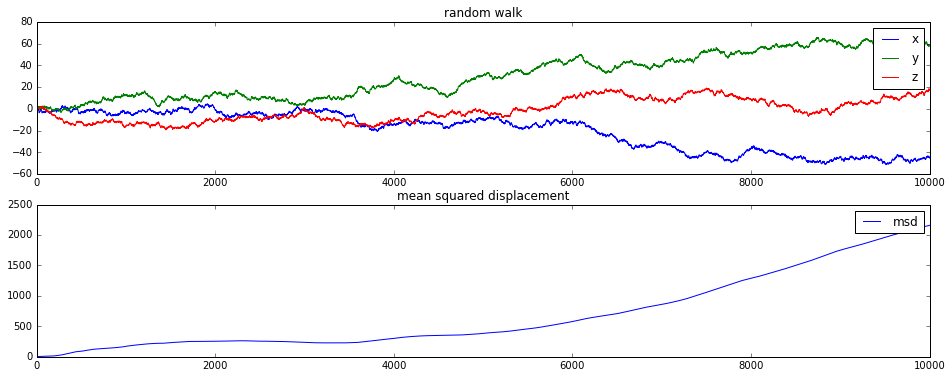

In [9]:
iterator(population=10)

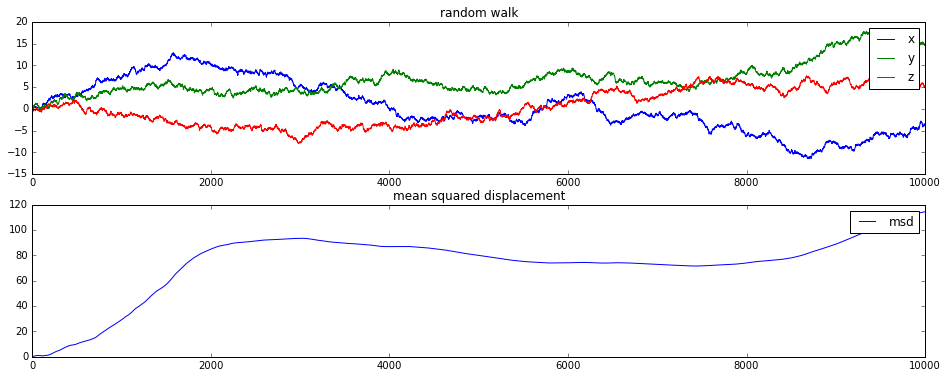

In [10]:
iterator(population=100)

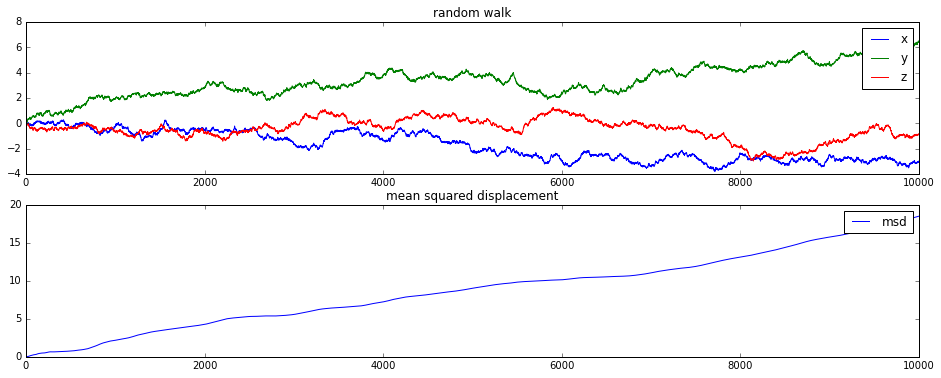

In [11]:
iterator(population=1000)

### mean

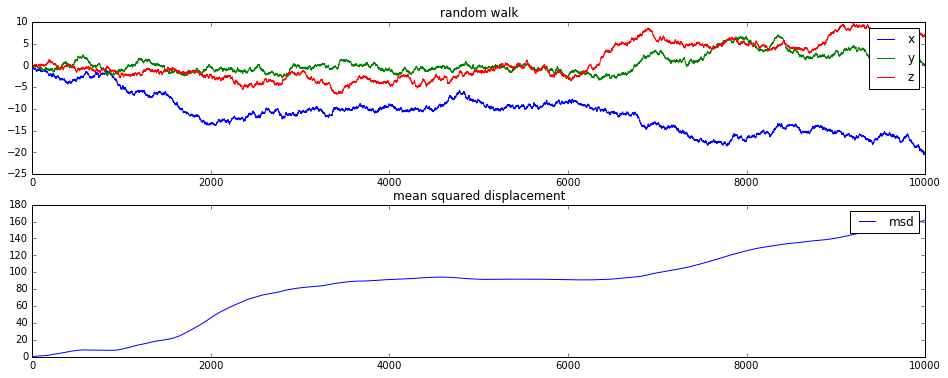

In [12]:
iterator(mean=0)

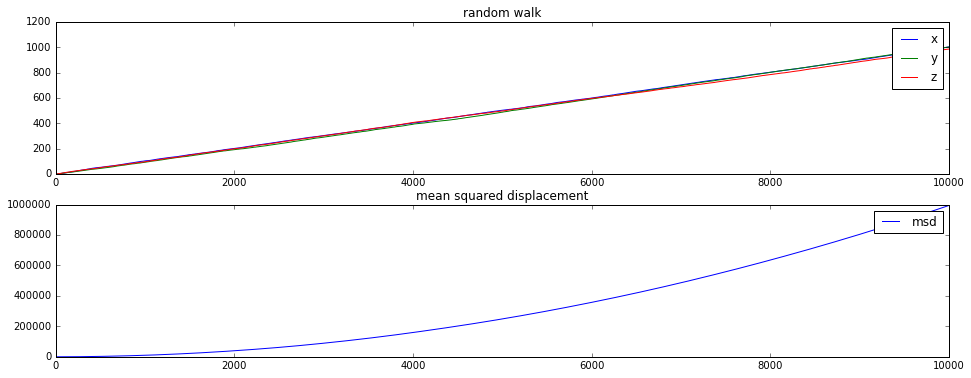

In [13]:
iterator(mean=0.1)

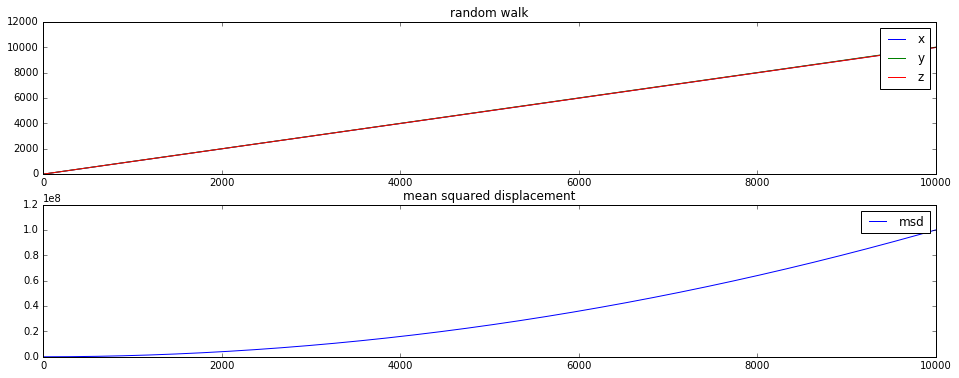

In [14]:
iterator(mean=1)

### STD

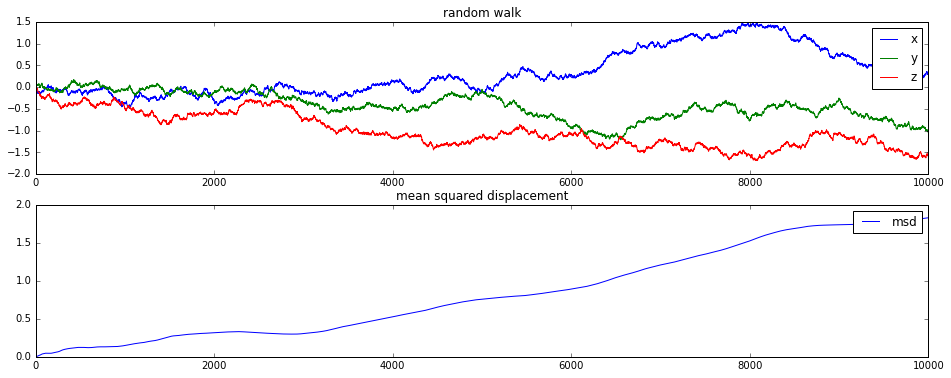

In [15]:
iterator(std=0.1)

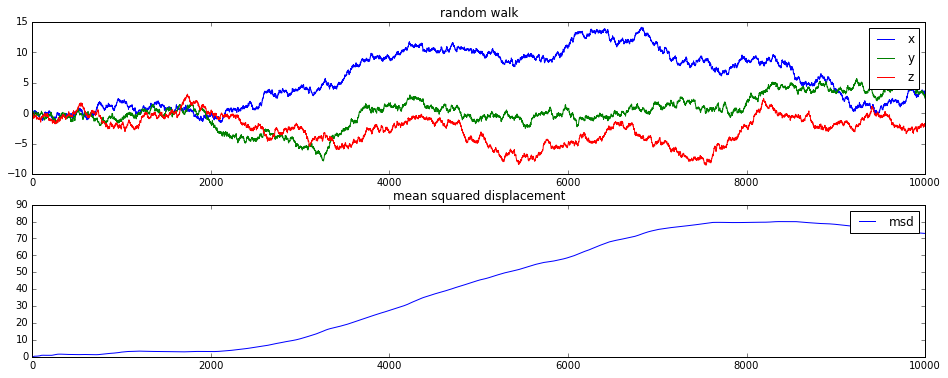

In [16]:
iterator(std=1)

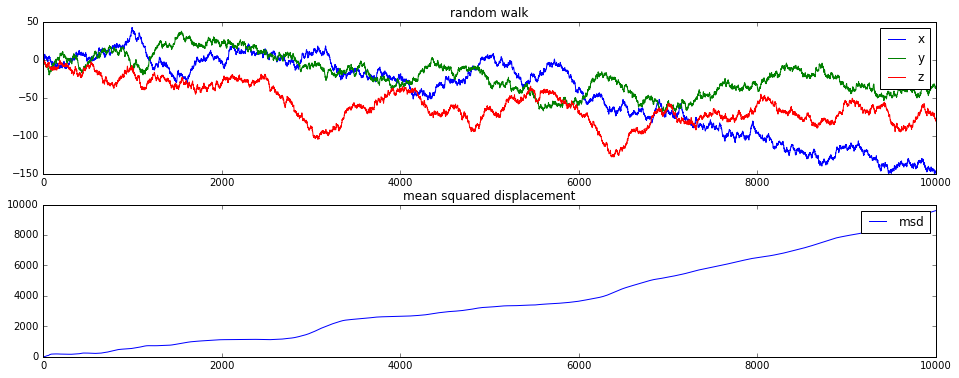

In [17]:
iterator(std=10)

### b

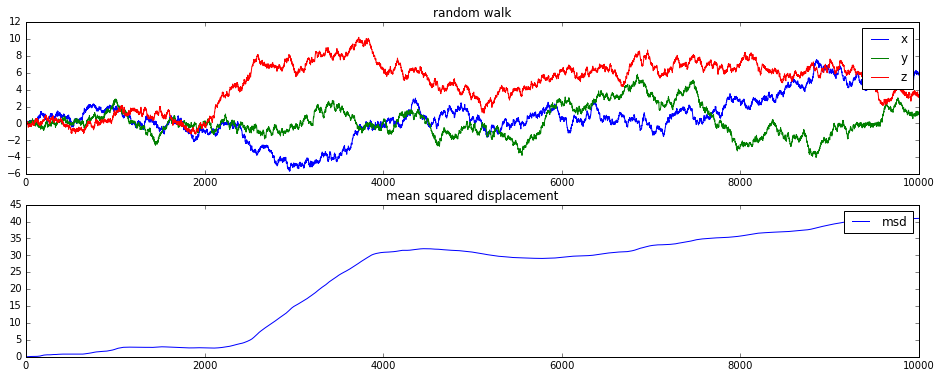

In [18]:
iterator(b=9, chm_src=True)

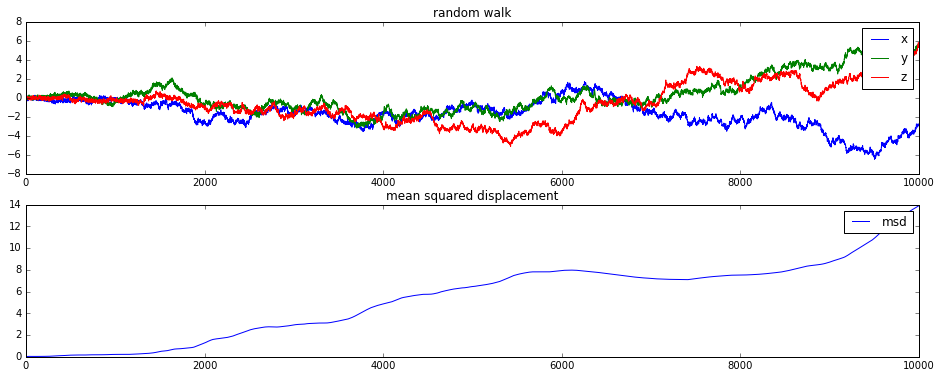

In [19]:
iterator(b=12, chm_src=True)

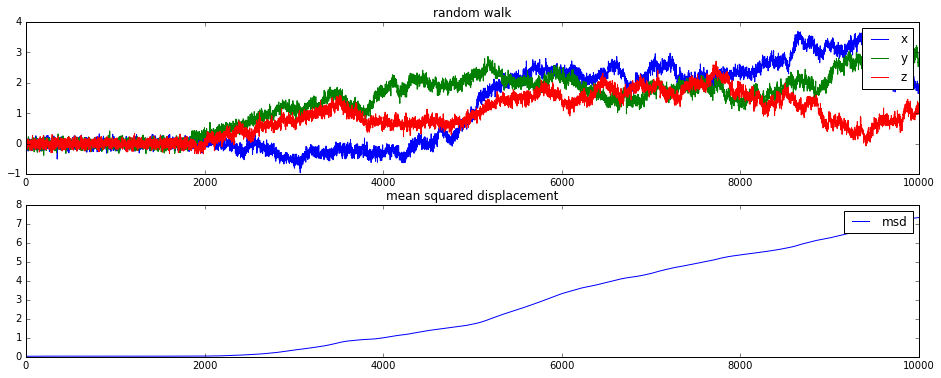

In [20]:
iterator(b=15, chm_src=True)

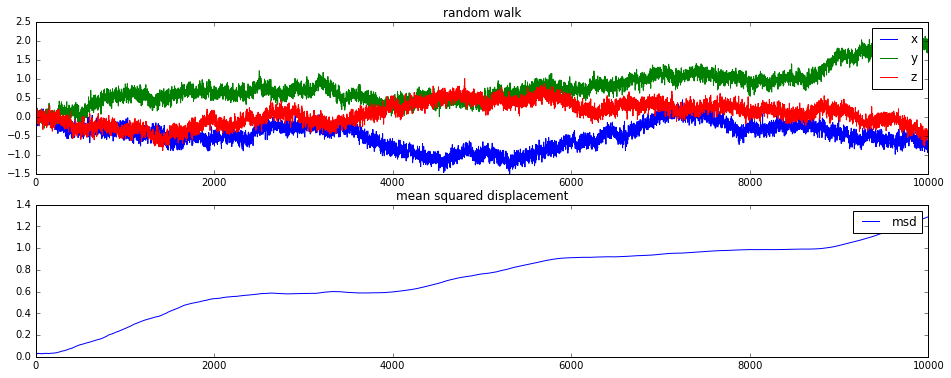

In [21]:
iterator(b=18, chm_src=True)

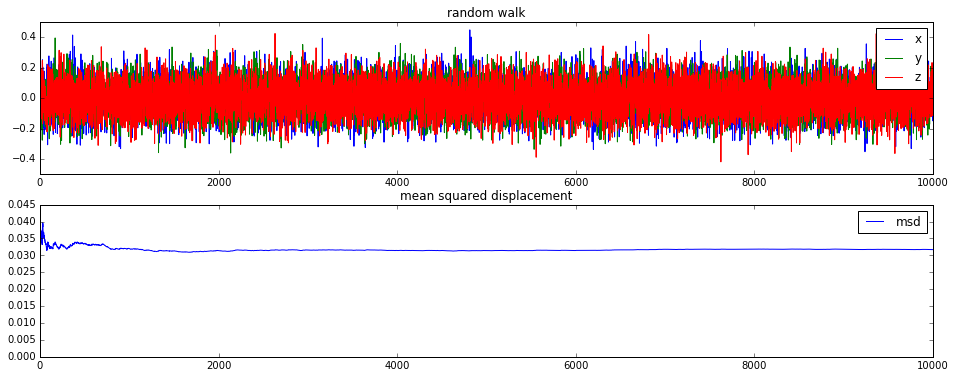

In [22]:
iterator(b=21, chm_src=True)